In [4]:
import pandas as pd
import numpy as np
import json

dfs=[]
for file_name in ["htimes1.csv"]:
    df = pd.read_csv(file_name, encoding='utf-16-le', sep=';')
    dfs.append(df)

In [5]:
df = pd.concat(dfs, ignore_index=True)
df

,elapsedMs,solvable,hasMultipleResults,easilySolvable,cells,cellsSolved,cellsHuman
0,20.3701,True,True,False,"[-1,-1,-1,-1,5,-1,7,-1,9,5,7,8,-1,-1,-1,-1,6,4...","[1,3,4,2,5,6,7,8,9,5,7,8,1,3,9,2,6,4,2,9,6,4,8...","[-1,-1,-1,-1,5,-1,7,8,9,5,7,8,-1,-1,-1,2,6,4,-..."
1,14136.1706,True,True,False,"[-1,-1,6,-1,-1,-1,4,-1,5,2,-1,-1,3,-1,5,7,8,-1...","[1,3,6,2,7,8,4,9,5,2,4,9,3,6,5,7,8,1,5,7,8,9,4...","[-1,-1,6,-1,-1,8,4,-1,5,2,4,-1,3,6,5,7,8,-1,-1..."
2,176.5586,True,True,False,"[3,4,6,-1,-1,-1,-1,-1,8,5,-1,-1,-1,3,-1,4,-1,7...","[3,4,6,2,7,9,5,1,8,5,2,9,1,3,8,4,6,7,1,8,7,4,5...","[3,4,6,-1,-1,-1,5,1,8,5,2,9,-1,3,-1,4,6,7,1,8,..."
3,9.0839,True,True,False,"[7,-1,-1,-1,5,-1,-1,-1,9,3,1,-1,4,-1,-1,-1,-1,...","[7,6,4,2,5,1,3,8,9,3,1,5,4,8,9,7,6,2,8,2,9,3,6...","[7,-1,4,-1,5,-1,-1,-1,9,3,1,-1,4,-1,-1,-1,-1,2..."
4,3.2588,True,True,False,"[7,2,-1,-1,-1,-1,6,-1,-1,-1,6,5,-1,-1,8,-1,1,-...","[7,2,1,3,4,5,6,9,8,3,6,5,2,9,8,4,1,7,4,8,9,7,1...","[7,2,-1,-1,-1,-1,6,-1,8,3,6,5,-1,-1,8,-1,1,-1,..."
5,6.8090,True,True,False,"[-1,-1,-1,5,7,-1,-1,-1,-1,2,5,-1,-1,1,-1,-1,-1...","[1,3,4,5,7,8,6,2,9,2,5,9,6,1,3,4,7,8,6,7,8,4,2...","[1,-1,-1,5,7,-1,-1,-1,-1,2,5,-1,6,1,-1,-1,-1,-..."
6,94.0715,True,True,False,"[-1,-1,9,-1,-1,-1,-1,6,-1,-1,6,-1,4,-1,-1,-1,-...","[1,7,9,2,3,8,4,6,5,2,6,8,4,5,7,1,9,3,3,4,5,1,9...","[-1,7,9,-1,-1,-1,-1,6,-1,-1,6,-1,4,-1,7,-1,-1,..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   elapsedMs           7 non-null      float64
 1   solvable            7 non-null      bool   
 2   hasMultipleResults  7 non-null      bool   
 3   easilySolvable      7 non-null      bool   
 4   cells               7 non-null      object 
 5   cellsSolved         7 non-null      object 
 6   cellsHuman          7 non-null      object 
dtypes: bool(3), float64(1), object(3)
memory usage: 377.0+ bytes


In [8]:
df["elapsedMs"].describe()

count        7.000000
mean      2063.760357
std       5323.816745
min          3.258800
25%          7.946450
50%         20.370100
75%        135.315050
max      14136.170600
Name: elapsedMs, dtype: float64

<Axes: xlabel='solvable'>

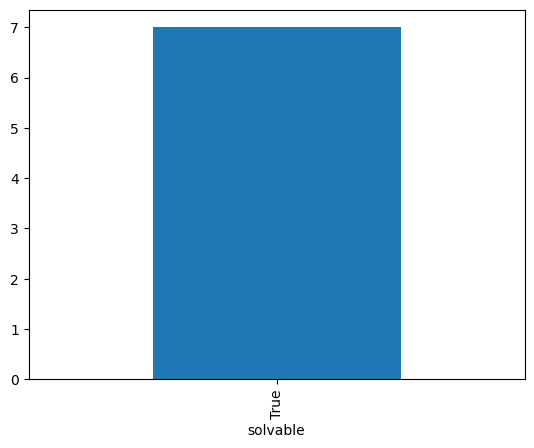

In [9]:
df["solvable"].value_counts().plot(kind="bar")

<Axes: xlabel='hasMultipleResults'>

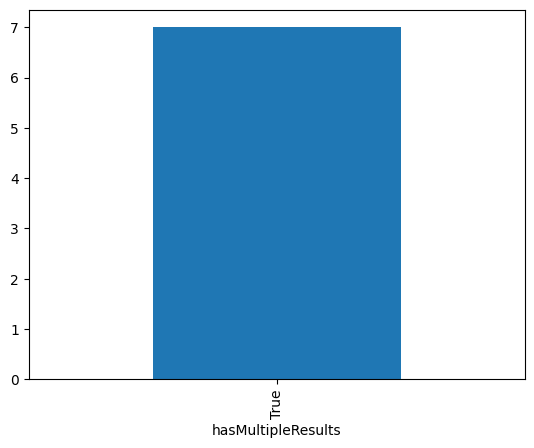

In [10]:
df[df['solvable']]["hasMultipleResults"].value_counts().plot(kind="bar")

<Axes: xlabel='easilySolvable'>

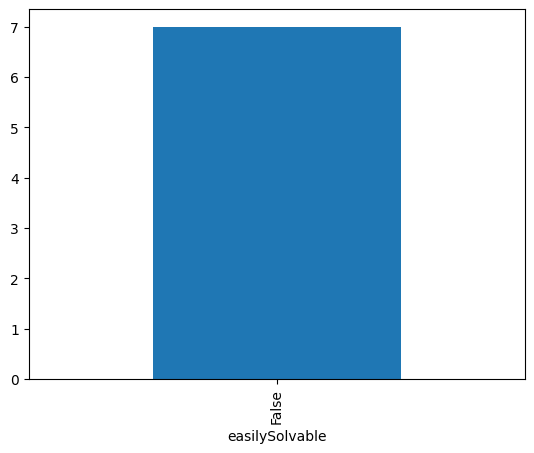

In [11]:
df[df['solvable']]["easilySolvable"].value_counts().plot(kind="bar")

In [12]:
np.matrix(df.loc[0]["cells"])

matrix([[-1, -1, -1, -1,  5, -1,  7, -1,  9,  5,  7,  8, -1, -1, -1, -1,
          6,  4, -1, -1, -1, -1,  8, -1,  3, -1,  1,  4,  5,  2,  8, -1,
         -1, -1, -1,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  8,  9,
         -1,  1, -1,  4, -1,  2, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
         -1,  5,  3, -1, -1, -1, -1,  7, -1,  2, -1, -1, -1,  8, -1, -1,
         -1]])

In [14]:

np.matrix([json.loads(df.loc[0]["cells"])[i:i+9] for i in range(0, 81, 9)]), np.matrix([json.loads(df.loc[0]["cellsHuman"])[i:i+9] for i in range(0, 81, 9)]), np.matrix([json.loads(df.loc[0]["cellsSolved"])[i:i+9] for i in range(0, 81, 9)])

(matrix([[-1, -1, -1, -1,  5, -1,  7, -1,  9],
         [ 5,  7,  8, -1, -1, -1, -1,  6,  4],
         [-1, -1, -1, -1,  8, -1,  3, -1,  1],
         [ 4,  5,  2,  8, -1, -1, -1, -1,  6],
         [-1, -1, -1, -1, -1, -1, -1, -1, -1],
         [-1,  8,  9, -1,  1, -1,  4, -1,  2],
         [-1, -1, -1, -1, -1, -1, -1, -1, -1],
         [-1, -1,  5,  3, -1, -1, -1, -1,  7],
         [-1,  2, -1, -1, -1,  8, -1, -1, -1]]),
 matrix([[-1, -1, -1, -1,  5, -1,  7,  8,  9],
         [ 5,  7,  8, -1, -1, -1,  2,  6,  4],
         [-1, -1, -1, -1,  8, -1,  3,  5,  1],
         [ 4,  5,  2,  8, -1, -1, -1, -1,  6],
         [-1, -1, -1, -1, -1, -1, -1, -1, -1],
         [-1,  8,  9, -1,  1, -1,  4, -1,  2],
         [-1, -1, -1, -1, -1, -1, -1, -1, -1],
         [-1, -1,  5,  3, -1, -1, -1, -1,  7],
         [-1,  2, -1, -1, -1,  8, -1, -1, -1]]),
 matrix([[1, 3, 4, 2, 5, 6, 7, 8, 9],
         [5, 7, 8, 1, 3, 9, 2, 6, 4],
         [2, 9, 6, 4, 8, 7, 3, 5, 1],
         [4, 5, 2, 8, 7, 3, 1, 9, 6]